In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import joblib


In [2]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [3]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


## 1. Explore train and test data:

In [5]:
train.info()
print('*********************************************')
print('*********************************************')
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
*********************************************
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null C

In [6]:
#missing values for each column with thier percentage 
train_total_missing_values=train.isnull().sum()
train_percentage_of_missing_values=(train_total_missing_values/train.isnull().count())*100
train_missing_trained_data_table=pd.concat([train_total_missing_values,train_percentage_of_missing_values],axis=1,keys=['Total missing values','percentage of missing values'])
train_missing_trained_data_table



,Total missing values,percentage of missing values
ID,0,0.000000
Gender,0,0.000000
Ever_Married,140,1.735250
Age,0,0.000000
Graduated,78,0.966782
Profession,124,1.536936
Work_Experience,829,10.275161
Spending_Score,0,0.000000
Family_Size,335,4.152206
Var_1,76,0.941993


In [7]:
test_total_missing_values=test.isnull().sum()
test_percentage_of_missing_values=(test_total_missing_values/test.isnull().count())*100
test_missing_trained_data_table=pd.concat([test_total_missing_values,test_percentage_of_missing_values],axis=1,keys=['Total missing values','percentage of missing values'])
test_missing_trained_data_table

,Total missing values,percentage of missing values
ID,0,0.000000
Gender,0,0.000000
Ever_Married,50,1.903312
Age,0,0.000000
Graduated,24,0.913590
Profession,38,1.446517
Work_Experience,269,10.239817
Spending_Score,0,0.000000
Family_Size,113,4.301485
Var_1,32,1.218120


Almost the majority of features have missing values! They should be handled well.

### check duplicates

In [8]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


**No duplicates in both sets**

### labels distribution

Text(0.5, 1.0, 'Label Distribution')

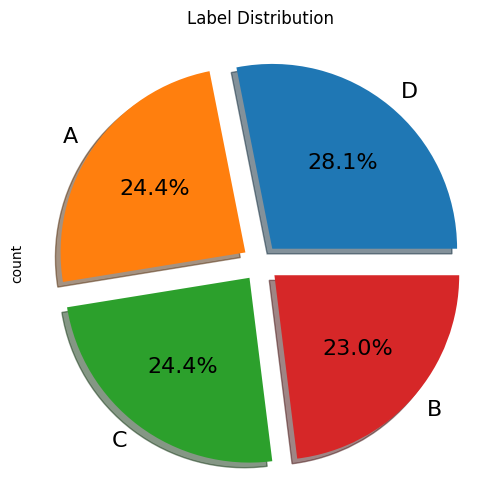

In [9]:
plt.figure(figsize=(6,6))

train['Segmentation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Label Distribution")

the lables are balanced , so no under or over sampling should be applied

### Numerical Features

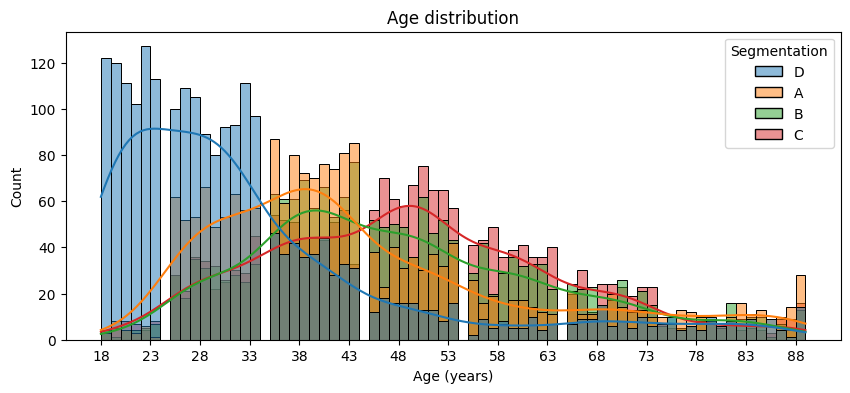

In [10]:

plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Segmentation', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')
plt.xticks(ticks=range(18, 91, 5))

plt.show()


<ul>
   <li>18-34 year olds were more likely to be on segment D</li>
    <li>35-44 year olds were more likely to be on segment A</li>
    <li>45–60  year olds were more likely to be on segment B</li>
    <li>60 and more year olds were more likely to be on segment C,with overlap around 38–43</li>

</ul>
to decide if this could be aplicable or not we will back to this later


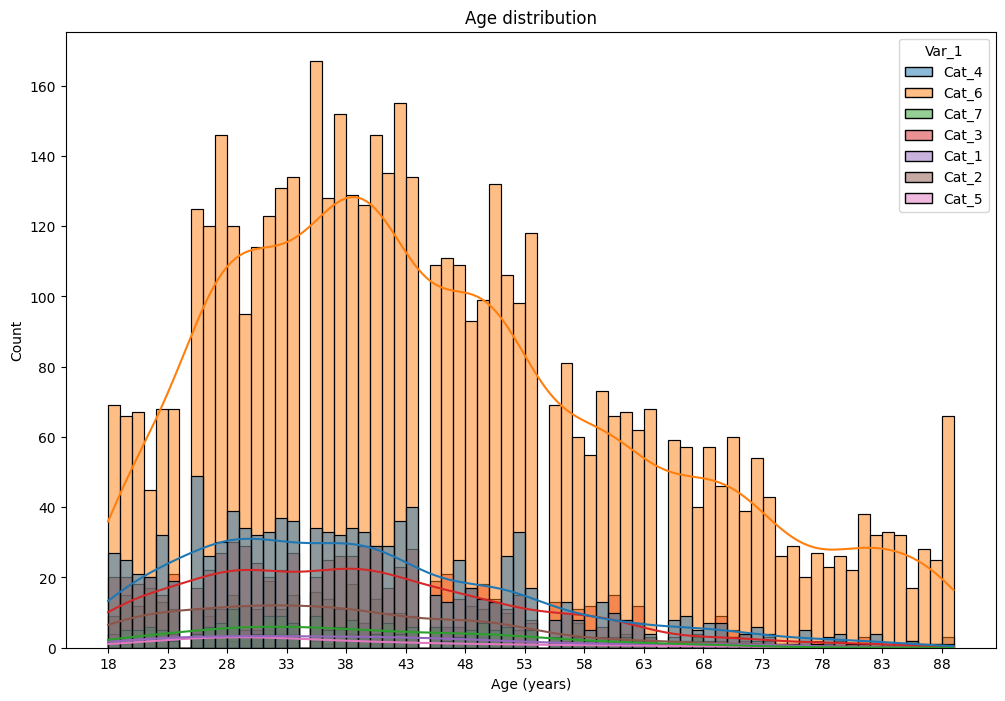

In [11]:

plt.figure(figsize=(12,8))

# Histogram
sns.histplot(data=train, x='Age', hue='Var_1', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')
plt.xticks(ticks=range(18, 91, 5))

plt.show()


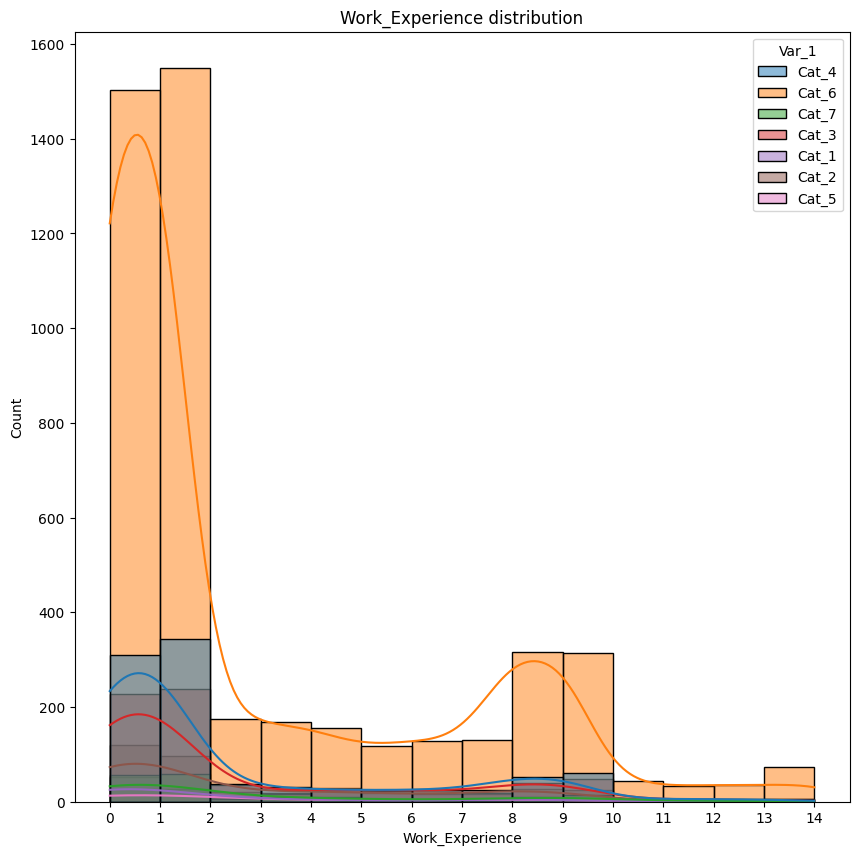

In [12]:

plt.figure(figsize=(10,10))

# Histogram
sns.histplot(data=train, x='Work_Experience', hue='Var_1', binwidth=1, kde=True)

# Aesthetics
plt.title('Work_Experience distribution')
plt.xlabel('Work_Experience')
plt.xticks(ticks=range(0, 15,1))

plt.show()


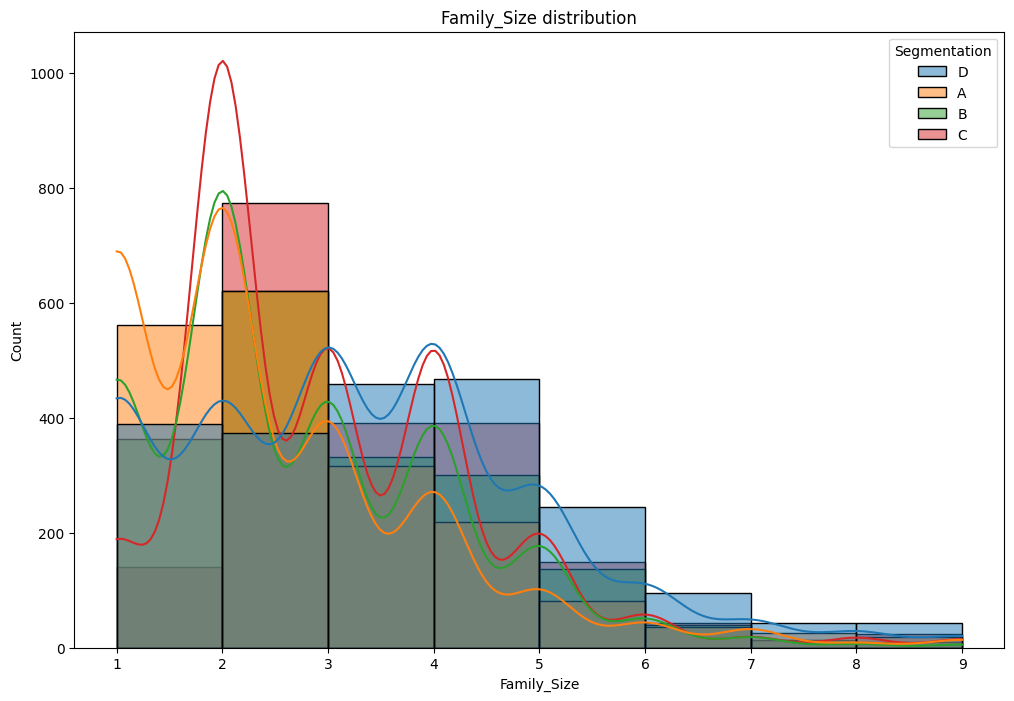

In [13]:

plt.figure(figsize=(12,8))

# Histogram
sns.histplot(data=train, x='Family_Size', hue='Segmentation', binwidth=1, kde=True)

# Aesthetics
plt.title('Family_Size distribution')
plt.xlabel('Family_Size')
plt.xticks(ticks=range(1, 10, 1))

plt.show()


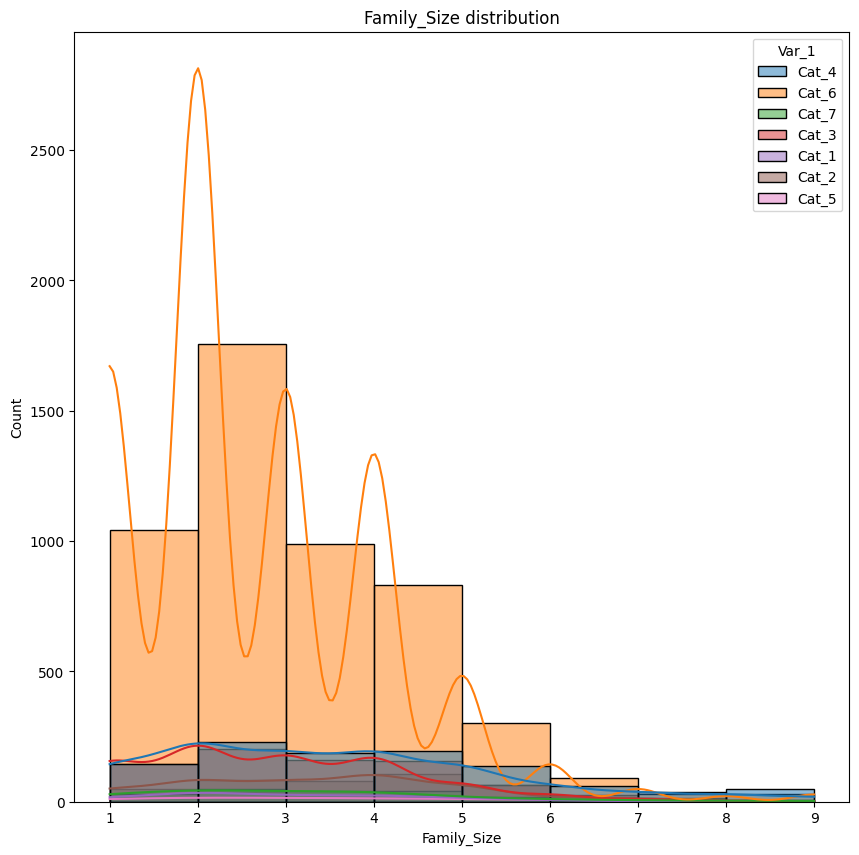

In [14]:

plt.figure(figsize=(10,10))

# Histogram
sns.histplot(data=train, x='Family_Size', hue='Var_1', binwidth=1, kde=True)

# Aesthetics
plt.title('Family_Size distribution')
plt.xlabel('Family_Size')
plt.xticks(ticks=range(1,10,1))

plt.show()


### Categorical features

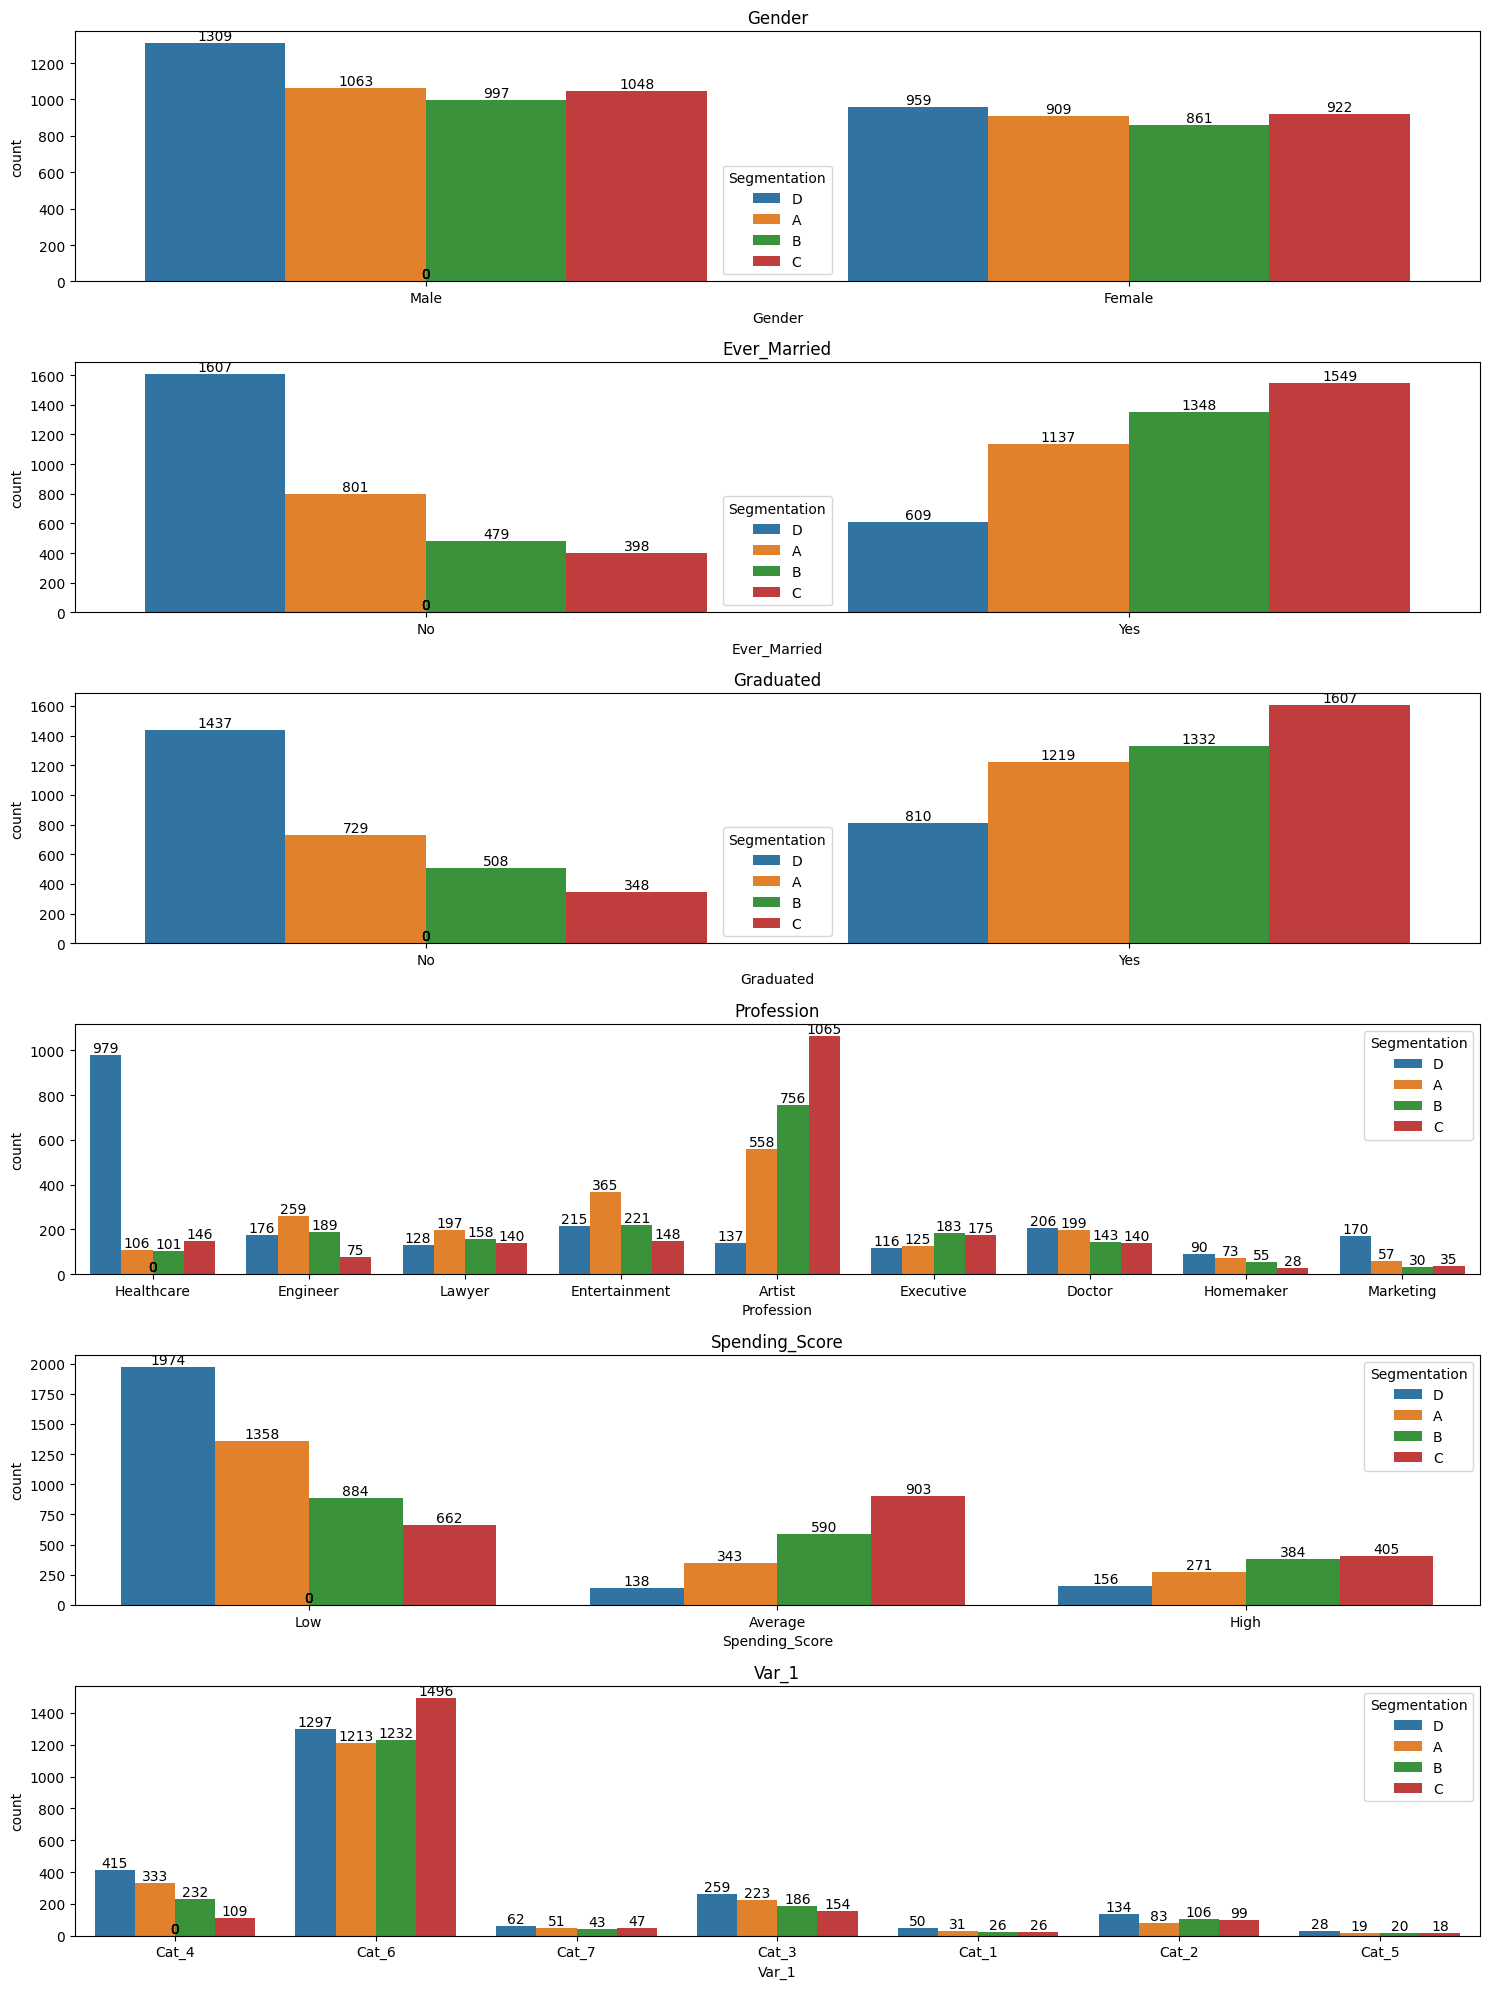

In [15]:
# Categorical features
cat_feats=['Gender', 'Ever_Married', 'Graduated', 'Profession','Spending_Score','Var_1']

# Plot categorical features
fig=plt.figure(figsize=(15,20))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(6,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Segmentation')
    ax.set_title(var_name)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black')
fig.tight_layout()  # Improves appearance a bit
plt.show()

**Insights**
<ol><li><b>Gender: </b>The proportion of male and female customers is almost equal across all segments, i.e. there is no strong indication that the segmentation is influenced by gender. So we meight drop it </li>
    
<li><b>Ever_Married: </b>Segment D is dominated the unmarried customers, while for married customers, segments A, B and C have a significantly higher representation.so this feature may be an influential factor in segmentation, with segment D being more prevalent among unmarried customers and the other segments towards married customers.</li>

<li><b>Graduated: </b>Non-graduates have a higher representation in segment D than graduates. Graduates also occupy segments A, B, and C with a high distribution with a slight difference. So it can be said that segment D mostly represents less educated customers.</li>

<li><b>Profession: </b>Healthcare is dominated by segment D, which appears to be fairly evenly distributed across the other segments. Engineers, lawyers, executives, and doctors are roughly evenly distributed across all segments. Artists are also overrepresented in segment C, indicating a strong relationship between this occupation and the segment. Finally, homemakers are overrepresented in segment D. Here, it can be argued that proficiency strongly influences segmentation for certain segments.</li>

<li><b>Spending Score: </b>Segment D dominates the low spending score, followed by segment A. Segment C is prominent in the avg spending score, and finally, the high spending score is almost equally distributed. Here we conclude that segment D represents low spenders and segment C represents medium and high spenders.</li>

<li><b>Var_1: </b>Cat_6: Dominates across all segments followed by cat_4 but with equal distribution bet. all segments. but cat_7 and cat_5 are rare across all segments. so Var_1 influane the segmentation </li>

</ol>

<h3>SUMMARY:</h3>
<ol>
    <li><b>D: </b>tend to represent young, unmarried, undergraduates, and low spending scores. </li>
    <li><b>A: </b>Fairly similar across most features. </li>
    <li><b>B: </b>Fairly similar across most features too. </li>
    <li><b>C: </b> higher in avg spending score, graduates,and some professions such as: artists. <u> <b> I think it is a VIP segment</b></u>. </li>

</ol>

### Data Describtion

In [16]:
numerical_stats = train.describe()
print("TRAINING numerical statistics :")
numerical_stats

TRAINING numerical statistics :


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [17]:
numerical_stats_test = test.describe()
print("TESTING numerical statistics :")
numerical_stats_test

TESTING numerical statistics :


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [18]:
categorical_stats = train.select_dtypes(include='object').describe()
print("TRAINING categorical statistics :")

categorical_stats

TRAINING categorical statistics :


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [19]:
categorical_stats_test = test.select_dtypes(include='object').describe()
print("TESTING categorical statistics :")

categorical_stats_test

TESTING categorical statistics :


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,2627,2577,2603,2589,2627,2595
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,1424,1520,1602,802,1616,1672


In [20]:
# percentage of common IDs between train and test
common_ids = set(train['ID']).intersection(set(test['ID']))
common_ids_count = len(common_ids)
unique_train_ids = train['ID'].nunique()
percentage_common_ids = (common_ids_count / unique_train_ids) * 100


print(f"Percentage of Common IDs: {percentage_common_ids:.2f}%")
print(f"Common IDs: {common_ids_count}")

#  number of unique IDs in the test set
unique_test_ids_count = test['ID'].nunique() - common_ids_count
print(f"Unique IDs in Test Set: {unique_test_ids_count}")

Percentage of Common IDs: 28.90%
Common IDs: 2332
Unique IDs in Test Set: 295


In [21]:
# Merge test and train datasets to check overlap
test_merged = test.merge(train, how='left', on='ID')

# Show result summary
print(f"Merged dataset size: {test_merged.shape}")

Merged dataset size: (2627, 20)


In [22]:
train.shape

(8068, 11)

In [23]:
test.shape


(2627, 10)

In [24]:
test_merged

,ID,Gender_x,Ever_Married_x,Age_x,Graduated_x,Profession_x,Work_Experience_x,Spending_Score_x,Family_Size_x,Var_1_x,Gender_y,Ever_Married_y,Age_y,Graduated_y,Profession_y,Work_Experience_y,Spending_Score_y,Family_Size_y,Var_1_y,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,Female,Yes,42.0,Yes,Engineer,1.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,Male,Yes,38.0,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,Female,Yes,71.0,No,NaN,1.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,Male,Yes,58.0,No,Executive,12.0,High,2.0,Cat_6,C
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,Female,No,20.0,No,Marketing,NaN,Low,4.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,Male,No,31.0,No,Healthcare,8.0,Low,4.0,Cat_6,D
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,Female,No,43.0,Yes,Doctor,0.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,Male,Yes,45.0,Yes,Executive,1.0,High,5.0,Cat_4,B


In [25]:
test_merged.isnull().sum()

ID                     0
Gender_x               0
Ever_Married_x        50
Age_x                  0
Graduated_x           24
Profession_x          38
Work_Experience_x    269
Spending_Score_x       0
Family_Size_x        113
Var_1_x               32
Gender_y             295
Ever_Married_y       341
Age_y                295
Graduated_y          317
Profession_y         329
Work_Experience_y    536
Spending_Score_y     295
Family_Size_y        399
Var_1_y              323
Segmentation         295
dtype: int64

In [26]:
#y:training data
#x: test data
# select rows with non-null values in any y column 
overlap_data_all = test_merged.dropna(subset=[col for col in test_merged.columns if col.endswith('_y')])

# select all column pairs to compare:
comparison_columns = [col[:-2] for col in overlap_data_all.columns if col.endswith('_x')]

# store results for all columns
differences_all = {}

# compare x and y columns
for col in comparison_columns:
    differences_all[col] = overlap_data_all[f"{col}_x"].equals(overlap_data_all[f"{col}_y"])

# results
for col, is_same in differences_all.items():
    print(f"Feature '{col}': {'Matches' if is_same else 'Differs'}")

Feature 'Gender': Matches
Feature 'Ever_Married': Matches
Feature 'Age': Differs
Feature 'Graduated': Matches
Feature 'Profession': Matches
Feature 'Work_Experience': Differs
Feature 'Spending_Score': Matches
Feature 'Family_Size': Matches
Feature 'Var_1': Matches


In [27]:
#store percentage of matching features
matching_stats = {}

for col in comparison_columns:
    matching_stats[col] = ((overlap_data_all[f"{col}_x"] == overlap_data_all[f"{col}_y"]).sum()/ len(overlap_data_all)*100)

# print
for col, match_percentage in matching_stats.items():
    print(f"Feature '{col}' matches {match_percentage:.2f}% ")


Feature 'Gender' matches 100.00% 
Feature 'Ever_Married' matches 100.00% 
Feature 'Age' matches 11.19% 
Feature 'Graduated' matches 100.00% 
Feature 'Profession' matches 100.00% 
Feature 'Work_Experience' matches 45.56% 
Feature 'Spending_Score' matches 100.00% 
Feature 'Family_Size' matches 100.00% 
Feature 'Var_1' matches 100.00% 


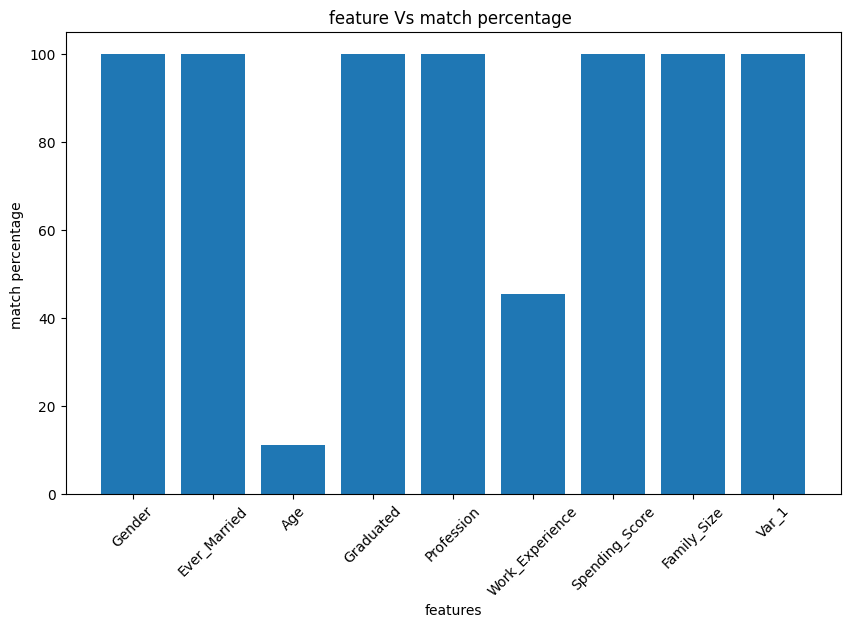

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(matching_stats.keys(), matching_stats.values())
plt.xlabel("features")
plt.ylabel("match percentage ")
plt.title("feature Vs match percentage ")
plt.xticks(rotation=45)
plt.show()

### summarry:

The results show a high percentage of identical values between the two datasets with similar IDs, which may lead to the **data leakage** problem:

1. 100% or high percentage of identical features between the training and test datasets enable the model to remember the relationships between these features, i.e. when these values appear in the test dataset, the model will predict the correct labels because it sees the actual set of features and values during training.
2. small ratio matching percantage(11.19% for Age, and 45.56% for work experiance): This indicates a low risk of data leakage for age, i.e. the model cannot be relied upon to remember the target variable. The approximately average match rate for work experience indicates some overlap.

<u><b>we will decide later how to solve this</u></b>

## Missing values
### Handling train Data

In [29]:
categorical_columns = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']

imputer = SimpleImputer(strategy='most_frequent')
train[categorical_columns] = imputer.fit_transform(train[categorical_columns])



In [30]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

In [31]:
train.iloc[186]

ID                 459576
Gender             Female
Ever_Married          Yes
Age                    85
Graduated              No
Profession         Lawyer
Work_Experience       NaN
Spending_Score        Low
Family_Size           NaN
Var_1               Cat_6
Segmentation            A
Name: 186, dtype: object

In [32]:
numeric_columns = ['Work_Experience', 'Family_Size']
imputer = SimpleImputer(strategy='median')
train[numeric_columns] = imputer.fit_transform(train[numeric_columns])
train[numeric_columns] = train[numeric_columns].astype(int)


In [33]:
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [34]:
train.iloc[186]

ID                 459576
Gender             Female
Ever_Married          Yes
Age                    85
Graduated              No
Profession         Lawyer
Work_Experience         1
Spending_Score        Low
Family_Size             3
Var_1               Cat_6
Segmentation            A
Name: 186, dtype: object

## Missing values
### Handling test Data

In [35]:
categorical_columns = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']

imputer = SimpleImputer(strategy='most_frequent')
test[categorical_columns] = imputer.fit_transform(test[categorical_columns])



In [36]:
test.isnull().sum()


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1                0
dtype: int64

In [37]:
numeric_columns = ['Work_Experience', 'Family_Size']
imputer = SimpleImputer(strategy='median')
test[numeric_columns] = imputer.fit_transform(test[numeric_columns])
test[numeric_columns] = test[numeric_columns].astype(int)


In [38]:
test.iloc[2]


ID                 458996
Gender             Female
Ever_Married          Yes
Age                    69
Graduated              No
Profession         Artist
Work_Experience         0
Spending_Score        Low
Family_Size             1
Var_1               Cat_6
Name: 2, dtype: object

### Encoding Categorical Values

"Ordinal encoding is similar to label encoding but allows you to explicitly define the mapping between categories and integer labels. This is especially useful when there is a clear and predefined ordinal relationship. You manually specify the order of categories and map them to integers accordingly." (Baruah, 2023) <b>Spending_Score</b>

In [39]:
train['Spending_Score']=train['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})
test['Spending_Score']=test['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

In [40]:
train.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1,0,4,Cat_4,D


In [41]:
test.head(1)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0,0,1,Cat_6


In [42]:
import joblib

categorical_columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
label_encoder = LabelEncoder()
for column in categorical_columns_to_encode:
    train[column] = label_encoder.fit_transform(train[column])
    joblib.dump(label_encoder, f'{column}_label_encoder.pkl')
for column in categorical_columns_to_encode:
    test[column] = label_encoder.fit_transform(test[column])


In [43]:
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,0,4,3,D
1,462643,0,1,38,1,2,1,1,3,3,A
2,466315,0,1,67,1,2,1,0,1,5,B
3,461735,1,1,67,1,7,0,2,2,5,B
4,462669,0,1,40,1,3,1,2,6,5,A


In [44]:
train['Segmentation'] = train['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [45]:
train.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,0,4,3,3
1,462643,0,1,38,1,2,1,1,3,3,0
2,466315,0,1,67,1,2,1,0,1,5,1
3,461735,1,1,67,1,7,0,2,2,5,1
4,462669,0,1,40,1,3,1,2,6,5,0


I think the scaling should be applied on: 
1) **age** since it contionus with high values
2) **Profession** bcz it ranges from 0-5 
3) **Work_Experience** (0-14)
4) **Family_Size** (1-9)
5) **Var_1** (0-6)


but scaling is depending on the model we will use,

## Solving data leakage problem

### 1) Removing common rows that has the same ID from the test dataset

In [46]:
unique_test_data = test[~test['ID'].isin(train['ID'])]

unique_test_data.shape

(295, 10)

### 2) Clustering data in the resultunt set after dropping rows with common IDs

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Select columns for normalization
numeric_columns = ['Age', 'Work_Experience', 'Family_Size']

# normalize the data points to cluster them well
scaler = MinMaxScaler()
normalized_data = unique_test_data.copy()
normalized_data[numeric_columns] = scaler.fit_transform(normalized_data[numeric_columns])

# perform KMeans 
kmeans_normalized = KMeans(n_clusters=4, random_state=42)
clusters_normalized = kmeans_normalized.fit_predict(normalized_data.drop(['ID'], axis=1))


normalized_data['Cluster'] = clusters_normalized

In [48]:
normalized_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
6,459005,1,1,0.614286,1,1,0.384615,0,0.250,5,0
19,459045,0,1,1.000000,1,7,0.076923,1,0.375,5,3
32,459090,1,0,0.185714,0,0,0.076923,0,0.125,5,0
38,459116,1,1,0.600000,1,0,0.153846,1,0.500,5,0
43,459121,0,1,0.471429,1,0,0.230769,1,0.625,5,0
...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,1,1,0.428571,1,0,0.230769,0,0.000,5,0
2612,467930,1,1,0.385714,1,3,0.307692,1,0.125,5,1
2616,467938,1,1,0.400000,1,3,0.384615,0,0.000,1,2
2624,467960,0,0,0.500000,1,3,0.076923,0,0.125,5,1


In [49]:
original_values = unique_test_data[numeric_columns].copy()

# Adding  the original values back to the normalized data with their corresponding clusters
final_clustered_data = normalized_data.copy()
for column in numeric_columns:
    final_clustered_data[f"Original_{column}"] = original_values[column]

In [50]:
final_clustered_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster,Original_Age,Original_Work_Experience,Original_Family_Size
6,459005,1,1,0.614286,1,1,0.384615,0,0.250,5,0,61,5,3
19,459045,0,1,1.000000,1,7,0.076923,1,0.375,5,3,88,1,4
32,459090,1,0,0.185714,0,0,0.076923,0,0.125,5,0,31,1,2
38,459116,1,1,0.600000,1,0,0.153846,1,0.500,5,0,60,2,5
43,459121,0,1,0.471429,1,0,0.230769,1,0.625,5,0,51,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,1,1,0.428571,1,0,0.230769,0,0.000,5,0,48,3,1
2612,467930,1,1,0.385714,1,3,0.307692,1,0.125,5,1,45,4,2
2616,467938,1,1,0.400000,1,3,0.384615,0,0.000,1,2,46,5,1
2624,467960,0,0,0.500000,1,3,0.076923,0,0.125,5,1,53,1,2


### 3) Removing the normalized data points columns and returning the original data to merge it with the training set

In [51]:
for column in numeric_columns:
    final_clustered_data[column] = final_clustered_data[f"Original_{column}"]

# Drop the columns holding original values
columns_to_drop = [f"Original_{column}" for column in numeric_columns]
final_clustered_data = final_clustered_data.drop(columns=columns_to_drop)

In [52]:
final_clustered_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
6,459005,1,1,61,1,1,5,0,3,5,0
19,459045,0,1,88,1,7,1,1,4,5,3
32,459090,1,0,31,0,0,1,0,2,5,0
38,459116,1,1,60,1,0,2,1,5,5,0
43,459121,0,1,51,1,0,3,1,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...
2607,467913,1,1,48,1,0,3,0,1,5,0
2612,467930,1,1,45,1,3,4,1,2,5,1
2616,467938,1,1,46,1,3,5,0,1,1,2
2624,467960,0,0,53,1,3,1,0,2,5,1


### 4) Renaming the Cluster column as Segmentation and merging it with the training set

In [53]:
# rename the Cluster column as Segmentation
final_clustered_data = final_clustered_data.rename(columns={'Cluster': 'Segmentation'})

# Merge the final clustered test data into the training dataset
merged_data_with_segmentation = pd.concat([train, final_clustered_data], ignore_index=True)

# Export the merged data to a CSV file
merged_data_with_segmentation.to_csv('merged_data_with_segmentation.csv', index=False)

### 5) Final data to deal with

In [54]:
merged_data_with_segmentation.shape

(8363, 11)

In [55]:
merged_data_with_segmentation

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,0,4,3,3
1,462643,0,1,38,1,2,1,1,3,3,0
2,466315,0,1,67,1,2,1,0,1,5,1
3,461735,1,1,67,1,7,0,2,2,5,1
4,462669,0,1,40,1,3,1,2,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8358,467913,1,1,48,1,0,3,0,1,5,0
8359,467930,1,1,45,1,3,4,1,2,5,1
8360,467938,1,1,46,1,3,5,0,1,1,2
8361,467960,0,0,53,1,3,1,0,2,5,1


In [56]:
merged_data_with_segmentation.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [57]:
import pandas as pd
my_df = pd.read_csv("merged_data_with_segmentation.csv")

my_df.dtypes

ID                 int64
Gender             int64
Ever_Married       int64
Age                int64
Graduated          int64
Profession         int64
Work_Experience    int64
Spending_Score     int64
Family_Size        int64
Var_1              int64
Segmentation       int64
dtype: object

In [58]:
my_df.shape

(8363, 11)

In [59]:
my_df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1,0,4,3,3
1,462643,0,1,38,1,2,1,1,3,3,0
2,466315,0,1,67,1,2,1,0,1,5,1
3,461735,1,1,67,1,7,0,2,2,5,1
4,462669,0,1,40,1,3,1,2,6,5,0


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

#Merged dataset is used here; 
data = pd.read_csv('merged_data_with_segmentation.csv')  # Replace with your actual file path

#Since gender does not affect the data, it has been dropped.
X = data.drop(['ID', 'Segmentation','Gender'], axis=1)
y = data['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# store evaluation results in used models in later stages.
results = {}


# Models:

### 1) Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

print(f"\n{'='*50}")
print("Model: Logistic Regression")
print(f"{'='*50}")

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results['Logistic Regression'] = accuracy

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.4668

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.44      0.40       406
           1       0.42      0.13      0.19       398
           2       0.45      0.58      0.51       412
           3       0.58      0.68      0.63       457

    accuracy                           0.47      1673
   macro avg       0.45      0.46      0.43      1673
weighted avg       0.46      0.47      0.44      1673

Confusion Matrix:
[[179  34  97  96]
 [127  50 160  61]
 [ 82  23 241  66]
 [ 94  13  39 311]]


### 2) Decision Tree

In [62]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

print(f"\n{'='*50}")
print("Model: Decision Tree")
print(f"{'='*50}")

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results['Decision Tree'] = accuracy

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model: Decision Tree
Accuracy: 0.4142

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.36      0.35       406
           1       0.32      0.33      0.33       398
           2       0.43      0.42      0.43       412
           3       0.57      0.52      0.54       457

    accuracy                           0.41      1673
   macro avg       0.41      0.41      0.41      1673
weighted avg       0.42      0.41      0.42      1673

Confusion Matrix:
[[148 104  71  83]
 [112 133  95  58]
 [ 82 114 175  41]
 [ 91  63  66 237]]


### 3) Random Forest

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

print(f"\n{'='*50}")
print("Model: Random Forest")
print(f"{'='*50}")

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results['Random Forest'] = accuracy

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model: Random Forest
Accuracy: 0.4686

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38       406
           1       0.38      0.34      0.36       398
           2       0.50      0.48      0.49       412
           3       0.58      0.65      0.61       457

    accuracy                           0.47      1673
   macro avg       0.46      0.46      0.46      1673
weighted avg       0.46      0.47      0.47      1673

Confusion Matrix:
[[155  84  60 107]
 [105 136 101  56]
 [ 65 100 197  50]
 [ 82  40  39 296]]


### 4) XGBoost

In [64]:
# XGBoost
from xgboost import XGBClassifier

print(f"\n{'='*50}")
print("Model: XGBoost")
print(f"{'='*50}")

model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results['XGBoost'] = accuracy

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model: XGBoost
Accuracy: 0.5009

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.45      0.42       406
           1       0.42      0.35      0.39       398
           2       0.57      0.52      0.54       412
           3       0.59      0.66      0.62       457

    accuracy                           0.50      1673
   macro avg       0.50      0.50      0.49      1673
weighted avg       0.50      0.50      0.50      1673

Confusion Matrix:
[[181  71  49 105]
 [107 141  94  56]
 [ 63  86 215  48]
 [ 99  36  21 301]]


### 5) Gradient Boosting

In [65]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

print(f"\n{'='*50}")
print("Model: Gradient Boosting")
print(f"{'='*50}")

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results['Gradient Boosting'] = accuracy

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model: Gradient Boosting
Accuracy: 0.5272

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       406
           1       0.47      0.35      0.40       398
           2       0.59      0.55      0.57       412
           3       0.60      0.71      0.65       457

    accuracy                           0.53      1673
   macro avg       0.52      0.52      0.52      1673
weighted avg       0.52      0.53      0.52      1673

Confusion Matrix:
[[187  66  51 102]
 [103 141  99  55]
 [ 58  64 228  62]
 [ 92  30   9 326]]


In [66]:
# dumping the model
import joblib
joblib.dump(model, 'gradient_boosting_model.pkl')
print("Successfully dumped the model in pickle file.")

Successfully dumped the model in pickle file.


### Comparing models based on Accuracy 

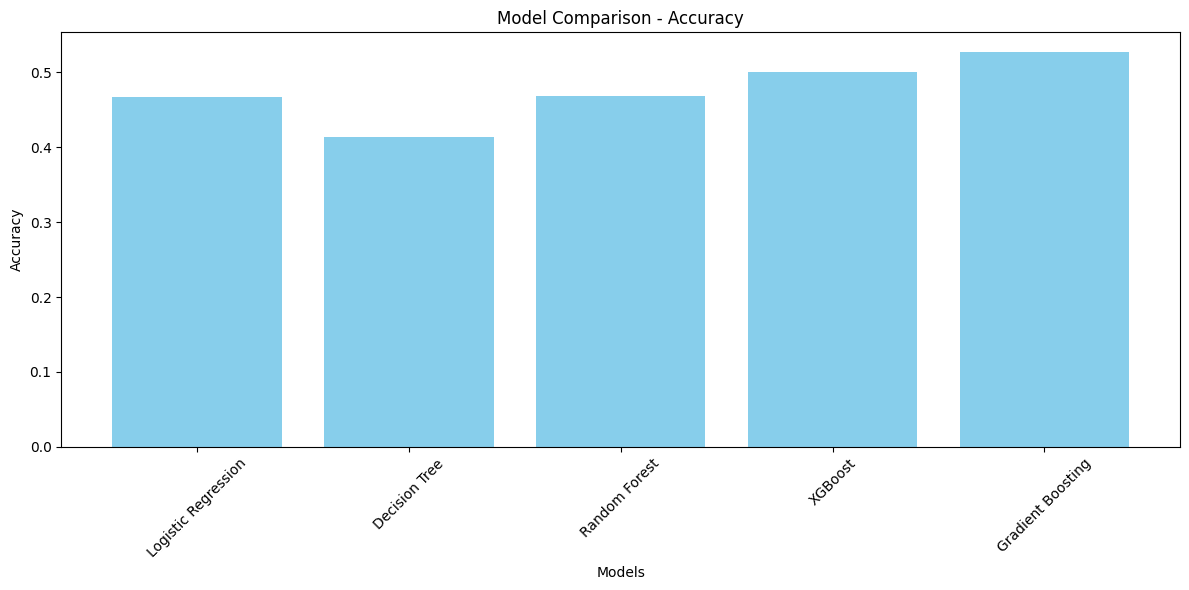


The best performing model is: Gradient Boosting with an accuracy of 0.5272


In [67]:
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_model = max(results, key=results.get)
print(f"\nThe best performing model is: {best_model} with an accuracy of {results[best_model]:.4f}")

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = data.drop(['ID', 'Segmentation','Gender'], axis=1)
y = data['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Finding best Hyperparameter (Hyperparameter Tuning)

### 1) Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

print("Tuning Logistic Regression")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Tuning Logistic Regression


/Malware/Class/AIDI/Semester1/Machine_Learning_Frameworks/venv125/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Malware/Class/AIDI/Semester1/Machine_Learning_Frameworks/venv125/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Malware/Class/AIDI/Semester1/Machine_Learning_Frameworks/venv125/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.48579970104633785
Test set accuracy: 0.45786013150029886

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.45      0.40       406
           1       0.42      0.09      0.15       398
           2       0.45      0.55      0.49       412
           3       0.56      0.70      0.62       457

    accuracy                           0.46      1673
   macro avg       0.45      0.45      0.42      1673
weighted avg       0.45      0.46      0.42      1673

Confusion Matrix:
[[181  22  88 115]
 [139  37 157  65]
 [ 94  20 228  70]
 [ 91   9  37 320]]


/Malware/Class/AIDI/Semester1/Machine_Learning_Frameworks/venv125/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Malware/Class/AIDI/Semester1/Machine_Learning_Frameworks/venv125/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<h1>Default Logistic Regression: </h1>
<ul>
    <li> Accuracy on Test Set: 0.4668</li>
    <li> It performed best with class 3 and class 2 but struggled especially with class 1 (very low recall) and did an okay job with class 0</li>
</ul>

<h1>Tuned Logistic Regression: </h1>
<ul>
    <li>based on the best parameters shown; the accuracy on Test Set : 0.4579</li>
<li>It performed best with class 3 and class 2 but struggled especially with class 1 (very low recall) and did an okay job with class 0 </li>
</ul>

<h1>Notes: </h1>
<ol><li>Tuned Logistic Regression showed a slight decrease in final performance on the test data indicating that the parameter tuning failed to generalize to the test set.</li>
<li>The tuned model did not enhance Recall for the class that has been more difficult to recognize (class 1), thus dragging down overall performance.</li>
</ol>

### 2) Decision Tree

In [70]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

print("Tuning Decision Tree")
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Tuning Decision Tree
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.5112107623318385
Test set accuracy: 0.5092647937836222

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.45      0.43       406
           1       0.42      0.28      0.34       398
           2       0.56      0.54      0.55       412
           3       0.59      0.73      0.65       457

    accuracy                           0.51      1673
   macro avg       0.50      0.50      0.49      1673
weighted avg       0.50      0.51      0.50      1673

Confusion Matrix:
[[182  75  46 103]
 [104 113 119  62]
 [ 62  59 223  68]
 [ 87  25  11 334]]


<h1>Default Decision Tree: </h1>
<ul>
    <li> Accuracy on Test Set:  0.4142</li>
    <li> It performed best with class 3 and class 2 but struggled especially with class 0 and class 1 in terms of recall and precision </li>
</ul>

<h1>Tuned Decision Tree: </h1>
<ul>
    <li>based on the best parameters shown; the accuracy on Test Set : 0.5093</li>
<li>It performed best with class 3 and class 2 but  class 1 remained challanging</li>
</ul>

<h1>Notes: </h1>
<ol><li>Tuned Decision Tree  showed a an increase in the overall accuracy so it has a better generalization to the test set.</li>


### 3) Random Forest

In [71]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

print("Tuning Random Forest")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Tuning Random Forest
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.5227204783258594
Test set accuracy: 0.5230125523012552

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.47      0.44       406
           1       0.46      0.32      0.37       398
           2       0.56      0.56      0.56       412
           3       0.60      0.72      0.66       457

    accuracy                           0.52      1673
   macro avg       0.51      0.52      0.51      1673
weighted avg       0.52      0.52      0.52      1673

Confusion Matrix:
[[189  64  54  99]
 [101 126 114  57]
 [ 59  63 231  59]
 [ 95  23  10 329]]


<h1>Default Random Forest: </h1>
<ul>
    <li> Accuracy on Test Set: 0.4686</li>
    <li> It performed best with class 3 and class 2 </li>
    <li>it struggled with class0 and class 1 </li>
</ul>

<h1>Tuned Random Forest: </h1>
<ul>
    <li>based on the best parameters shown; the accuracy on Test Set : 0.5230</li>
<li>It performed best and improved with class 3 and class 2 but struggled especially with class 1  and did an okay job (but improved) with class 0 </li>
</ul>

<h1>Notes: </h1>
<ol><li>Tuned Random Forest showed a meaningful increase in final performance on the test data indicating that the tuning process led to better generalization and a more balanced performance compared to the default Random Forest model.</li>

</ol>

### 4) XGBoost

In [72]:
# XGBoost
from xgboost import XGBClassifier

print("Tuning XGBoost")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Tuning XGBoost
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score: 0.5221225710014947
Test set accuracy: 0.5164375373580394

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.42       406
           1       0.46      0.31      0.37       398
           2       0.57      0.55      0.56       412
           3       0.59      0.73      0.65       457

    accuracy                           0.52      1673
   macro avg       0.51      0.51      0.50      1673
weighted avg       0.51      0.52      0.51      1673

Confusion Matrix:
[[178  66  54 108]
 [102 125 109  62]
 [ 66  54 226  66]
 [ 89  24   9 335]]


<h1>Default XGBoost: </h1>
<ul>
    <li> Accuracy on Test Set: 0.5009</li>
    <li> It performed best with class 3 and class 2 </li>
    <li>it struggled with class0 and class 1 </li>
</ul>

<h1>Tuned XGBoost: </h1>
<ul>
    <li>based on the best parameters shown; the accuracy on Test Set : 0.5164</li>
<li>It performed best and improved with class 3 , where class 2 remains as is  </li>
</ul>

<h1>Notes: </h1>
<ol><li>Tuned XGBoost showed an increase in final performance on the test data by slightly increasing the accuracy  indicating that the tuning process led to better generalization .</li>

</ol>

### 5) Gradient Boosting

In [73]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

print("Tuning Gradient Boosting")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Tuning Gradient Boosting
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best cross-validation score: 0.5251121076233185
Test set accuracy: 0.5140466228332337

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.43      0.43       406
           1       0.44      0.32      0.37       398
           2       0.56      0.54      0.55       412
           3       0.59      0.73      0.65       457

    accuracy                           0.51      1673
   macro avg       0.50      0.51      0.50      1673
weighted avg       0.50      0.51      0.50      1673

Confusion Matrix:
[[175  71  50 110]
 [ 96 126 116  60]
 [ 55  68 224  65]
 [ 87  24  11 335]]


<h1>Default Gradient Boosting: </h1>
<ul>
    <li> Accuracy on Test Set: 0.5266</li>
    <li> It performed best with class 3 and class 2 </li>
    <li>moderate improvements with class 0 and class 1 </li>
</ul>

<h1>Tuned Gradient Boosting: </h1>
<ul>
    <li>based on the best parameters shown; the accuracy slightly decreased on Test Set to : 0.5140</li>
<li>It performed best and improved with class 3 but Class 0 and Class 1 remain weaker    </li>
</ul>

<h1>Notes: </h1>
<ol><li>Tuned XGBoost didn't improve test accuracy, the default Gradient Boosting model provided a relatively balanced class performance, but parameter tuning in did not enhance final test set results.</li>

</ol>

#### Saving the final model to use via flask app

In [74]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

print(f"\n{'='*50}")
print("Model: Gradient Boosting")
print(f"{'='*50}")

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
results['Gradient Boosting'] = accuracy

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model: Gradient Boosting
Accuracy: 0.5272

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       406
           1       0.47      0.35      0.40       398
           2       0.59      0.55      0.57       412
           3       0.60      0.71      0.65       457

    accuracy                           0.53      1673
   macro avg       0.52      0.52      0.52      1673
weighted avg       0.52      0.53      0.52      1673

Confusion Matrix:
[[187  66  51 102]
 [103 141  99  55]
 [ 58  64 228  62]
 [ 92  30   9 326]]


In [75]:
# dumping the model
import joblib
joblib.dump(model, 'gradient_boosting_model.pkl')
print("Successfully dumped the model in pickle file.")

Successfully dumped the model in pickle file.
